In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer

df = pd.read_csv('UldBalanceAndStation.csv')

df

,Station,Uld Type,Carrier Code,Content Code,Sum Balance,Average Balance,Rolling SD Average,Slope,Total Uld In,Total Uld Out,Amount of Flight In,Amount of Flight Out,Sum Flight In-Out,Amount of stationary chunks
0,AKL,AKE,CX,C,-18.000000,-2.069551,1.570313,-3.367163e-02,0.272727,18.272727,0.272727,15.727273,16.000000,6
1,AMS,AKE,CX,C,24.333333,3.201659,2.532617,-4.304906e-01,25.333333,1.000000,16.600000,0.800000,17.400000,3
2,BKK,AKE,CX,C,3.714286,0.482086,1.833233,1.345238e-01,7.928571,4.214286,5.642857,4.071429,9.714286,4
3,BNE,AKE,CX,C,-12.750000,-2.570833,1.904539,6.568452e-01,0.500000,13.250000,0.500000,7.312500,7.812500,4
4,BOM,AKE,CX,C,17.000000,2.428571,1.583718,-4.642857e-01,17.000000,0.000000,11.000000,0.000000,11.000000,0
5,CDG,AKE,CX,C,12.125000,1.620337,0.695348,-1.324405e-01,12.375000,0.250000,12.375000,0.250000,12.625000,7
6,CEB,AKE,CX,C,-20.000000,-3.333333,2.404163,1.714286e-01,0.000000,20.000000,0.000000,7.000000,7.000000,0
7,CGK,AKE,CX,C,0.666667,0.044444,0.942809,2.142857e-02,3.666667,3.000000,2.500000,2.833333,5.333333,2
8,DXB,AKE,CX,C,10.666667,1.759524,1.081817,1.309524e-01,11.000000,0.333333,7.000000,0.333333,7.333333,0
9,FCO,AKE,CX,C,-6.000000,-1.500000,0.942809,-2.000000e-01,0.000000,6.000000,0.000000,4.000000,4.000000,0


In [2]:
#X = df.drop(['Station', 'Uld Type', 'Carrier Code', 'Content Code'], axis=1)
X = df[['Average Balance', 'Amount of stationary chunks', 'Slope']]

X

,Average Balance,Amount of stationary chunks,Slope
0,-2.069551,6,-3.367163e-02
1,3.201659,3,-4.304906e-01
2,0.482086,4,1.345238e-01
3,-2.570833,4,6.568452e-01
4,2.428571,0,-4.642857e-01
5,1.620337,7,-1.324405e-01
6,-3.333333,0,1.714286e-01
7,0.044444,2,2.142857e-02
8,1.759524,0,1.309524e-01
9,-1.500000,0,-2.000000e-01


In [3]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X)

X = imp.transform(X)

print(X)

[[ -2.06955103e+00   6.00000000e+00  -3.36716314e-02]
 [  3.20165945e+00   3.00000000e+00  -4.30490620e-01]
 [  4.82086168e-01   4.00000000e+00   1.34523810e-01]
 [ -2.57083333e+00   4.00000000e+00   6.56845238e-01]
 [  2.42857143e+00   0.00000000e+00  -4.64285714e-01]
 [  1.62033730e+00   7.00000000e+00  -1.32440476e-01]
 [ -3.33333333e+00   0.00000000e+00   1.71428571e-01]
 [  4.44444444e-02   2.00000000e+00   2.14285714e-02]
 [  1.75952381e+00   0.00000000e+00   1.30952381e-01]
 [ -1.50000000e+00   0.00000000e+00  -2.00000000e-01]
 [  1.32500000e+00   0.00000000e+00  -6.24500451e-17]
 [ -2.75000000e+00   0.00000000e+00   1.10000000e+00]
 [  1.48881988e+01   1.00000000e+00   7.37004300e-01]
 [  1.21666667e+00   1.00000000e+00   6.66666667e-02]
 [  1.02500000e+00   1.00000000e+00  -2.00000000e-01]
 [  1.77790404e+00   2.00000000e+00  -1.45841064e-01]
 [  6.75000000e-01   0.00000000e+00  -1.64285714e-01]
 [  2.95238095e-01   0.00000000e+00  -8.57142857e-02]
 [ -1.35235026e+01   3.00000

In [8]:
Y = KMeans(n_clusters=9).fit_predict(X)

In [9]:
X_reduced = PCA(n_components = 2).fit_transform(X)

print(X_reduced)

[[ -2.22518081   4.28957311]
 [  3.28545352   1.76099899]
 [  0.49596051   2.52661265]
 [ -2.53737993   2.26603958]
 [  2.78125136  -1.29575373]
 [  1.35968125   5.61017075]
 [ -2.94855325  -1.79395307]
 [  0.23600652   0.49399927]
 [  2.12315808  -1.34405728]
 [ -1.12777814  -1.63853169]
 [  1.68857555  -1.38490295]
 [ -2.35470751  -1.72533881]
 [ 15.11842511   0.82462521]
 [  1.49286092  -0.39735895]
 [  1.2982729   -0.41920004]
 [  1.96014126   0.64432078]
 [  1.03892575  -1.44542503]
 [  0.66178781  -1.47758958]
 [-13.36994503   0.28394414]
 [ -0.83997317   1.40125856]
 [ -1.94269959  -0.68152618]
 [ -1.80782603   1.31729945]
 [ -0.76640472  -1.61091261]
 [ -0.13182003  -1.55004761]
 [  0.63792539  -0.4768104 ]
 [ -3.58039488   0.14055389]
 [  3.3966206   -1.23522817]
 [  0.16744208   2.49869533]
 [  0.46108099  -0.49730666]
 [ -0.38496762  -1.57766047]
 [ -1.88396079  -0.69710287]
 [ -6.28074472  -0.08658729]
 [  3.36777613  -1.23362191]
 [  0.61099048  -1.4891764 ]]


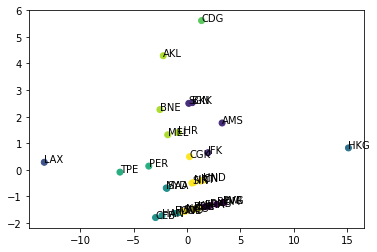

In [10]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)

for i in range(len(df['Station'])):
    plt.annotate(df['Station'][i], (X_reduced[i, 0], X_reduced[i, 1]))

plt.show()